# Import Libraries

In [0]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm

# Preprocessing and evaluation metrics

from sklearn.preprocessing import Normalizer, scale, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  confusion_matrix, classification_report
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score  
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error 

# Deep Learning libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import UpSampling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from tensorflow.keras.losses import mean_squared_error, categorical_crossentropy, cosine_similarity
from tensorflow.keras.regularizers import l1, l2

# For Transfer Learning
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.layers.advanced_activations import LeakyReLU

# Visualisation

import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

In [3]:
# Load Full Dataset

train = pd.read_csv('drive/My Drive/RandomProjects/Fashion MNIST/fashion-mnist_train.csv')
test = pd.read_csv('drive/My Drive/RandomProjects/Fashion MNIST/fashion-mnist_test.csv')

df_train = train.copy()
df_test = test.copy()

print("Original Shape of Train Dataset:", df_train.shape[0], 'X' , df_train.shape[1])
print("Original Shape of Test Dataset:", df_test.shape[0], 'X' , df_test.shape[1])

# Seperate ID numbers and target features from train and test dataset

train_feat = df_train.iloc[:, 1:]
train_lab = df_train.label

test_feat = df_test.iloc[:, 1:]
test_lab = df_test.label


print("\nTrain Features:", train_feat.shape[0], 'X' , train_feat.shape[1], '\nTrain Labels:' , train_lab.shape[0], 'X 1')

print("\nTest Features:", test_feat.shape[0], 'X' , test_feat.shape[1], '\nTest Labels:' , test_lab.shape[0], 'X 1')




Original Shape of Train Dataset: 60000 X 785
Original Shape of Test Dataset: 10000 X 785

Train Features: 60000 X 784 
Train Labels: 60000 X 1

Test Features: 10000 X 784 
Test Labels: 10000 X 1


# Data Preprocessing

## Normalize the dataset

* Data samples need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster. Here, we also acheive Zero Mean and Unit Variance.

* Normalization is carried out as follows: 
> x = (x - min) / (max - min) ; Here min= 0 and max= 255

In [0]:
train_feat = train_feat.astype("float32")/255

test_feat = test_feat.astype("float32")/255

## Change Image Input Channels for Loading into Pre-Trained Models

In [6]:
# Change number of input channels in dataset
train_feat = np.dstack([train_feat] * 3)
test_feat = np.dstack([test_feat] * 3)

print("\nShape of Train Features:", train_feat.shape[0], 'X' , train_feat.shape[1], 'X' , train_feat.shape[2])

print("\nShape of Test Features:", test_feat.shape[0], 'X' , test_feat.shape[1], 'X' , test_feat.shape[2])



Shape of Train Features: 60000 X 784 X 3

Shape of Test Features: 10000 X 784 X 3


## Reshape the Images

* Reshape 1D image vectors into 28X28X1 3D matrices before feeding them to a CNN
* Keras wants an extra dimension in end for grayscale images

In [7]:
# For Pretrained Models
train_feat = train_feat.reshape((-1, 28, 28, 3))
test_feat = test_feat.reshape((-1, 28, 28, 3))

print("\nNew Shape of Train Features:", train_feat.shape[0], 'X' , train_feat.shape[1], 'X' , train_feat.shape[2], 'X' , train_feat.shape[3])

print("\nNew Shape of Test Features:", test_feat.shape[0], 'X' , test_feat.shape[1], 'X' , test_feat.shape[2], 'X' , test_feat.shape[3])



New Shape of Train Features: 60000 X 28 X 28 X 3

New Shape of Test Features: 10000 X 28 X 28 X 3


## Resize the images width and height

In [8]:
train_feat = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_feat])
test_feat = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_feat])

# Display the new shape

print("\nNew Shape of Train Features:", train_feat.shape[0], 'X' , train_feat.shape[1], 'X' , train_feat.shape[2], 'X' , train_feat.shape[3])

print("\nNew Shape of Test Features:", test_feat.shape[0], 'X' , test_feat.shape[1], 'X' , test_feat.shape[2], 'X' , test_feat.shape[3])



New Shape of Train Features: 60000 X 48 X 48 X 3

New Shape of Test Features: 10000 X 48 X 48 X 3


## One Hot encoding of target variables

In [9]:
# Convert Target variables into one hot encoded targets

train_lab = df_train['label']

train_lab = to_categorical(train_lab, num_classes=10)
print('Shape of Target Features:', train_lab.shape)

test_lab = df_test['label']

test_lab = to_categorical(test_lab, num_classes=10)
print('Shape of Target Features:', test_lab.shape)


Shape of Target Features: (60000, 10)
Shape of Target Features: (10000, 10)


## Split Train Dataset to Train and Validation set

In [10]:
# For Pre Trained Models
tr_x_train, tr_x_val, tr_y_train, tr_y_val = train_test_split(train_feat, train_lab, test_size = 0.2, random_state= 42)

print(tr_x_train.shape)
print(tr_y_train.shape)
print(tr_x_val.shape)
print(tr_y_val.shape)

(48000, 48, 48, 3)
(48000, 10)
(12000, 48, 48, 3)
(12000, 10)


# Transfer Learning Based Approach


# **XCEPTION NET**

## Preprocess input

In [0]:
from tensorflow.keras.applications.xception import preprocess_input

x_train = preprocess_input(tr_x_train)
x_val = preprocess_input(tr_x_val)
df_test2 = preprocess_input(df_test2)

## Load a pretrained model

In [0]:
xcep = Xception(include_top= False, weights= 'imagenet', input_shape= (71, 71, 3))

xcep.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 71, 71, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_9[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

## Extract Features from our dataset

In [0]:
# Extracting features
train_features = xcep.predict(np.array(x_train), batch_size=16, verbose=1)
test_features = xcep.predict(np.array(test_feat), batch_size=16, verbose=1)
val_features = xcep.predict(np.array(x_val), batch_size=16, verbose=1)

# Current shape of features
print(train_features.shape)
print(test_features.shape)
print(val_features.shape)

12000/12000 [==============================] - 14s 1ms/step
(48000, 3, 3, 2048)
(10000, 3, 3, 2048)
(12000, 3, 3, 2048)


## Flatten the extracted features

In [0]:
# Flatten extracted features
train_flatten = np.reshape(train_features, (48000, 3*3*2048))
test_flatten = np.reshape(test_features, (10000, 3*3*2048))
val_flatten = np.reshape(val_features, (12000, 3*3*2048))

# New shape of features
print(train_flatten.shape)
print(test_flatten.shape)
print(val_flatten.shape)

(48000, 18432)
(10000, 18432)
(12000, 18432)


## Adding Dense layers for training and validation

In [0]:
# Add dense layers to the model

# epoch = 100

xcep = models.Sequential()
xcep.add(layers.Dense(18432, activation='relu', input_dim=(3*3*2048)))
xcep.add(layers.Dropout(0.5))

xcep.add(layers.Dense(2048, activation='relu'))
xcep.add(layers.Dropout(0.5))

xcep.add(layers.Dense(64, activation='relu'))
xcep.add(layers.Dropout(0.5))

xcep.add(layers.LeakyReLU(alpha=0.1))

xcep.add(layers.Dense(5, activation= 'softmax'))


## Compile the model

In [0]:
# Compile the model.
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

xcep.compile(loss='categorical_crossentropy',optimizer= opt, metrics=['acc'])

## Train the Model

In [0]:
rop = ReduceLROnPlateau(monitor='val_loss',
                        factor=0.2,
                        patience=2,
                        verbose=1,
                        mode='auto',
                        min_delta=0.0001,
                        cooldown=2,
                        min_lr=0)

lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

# Train the the model
xception_train = xcep.fit(train_flatten, tr_y_train, epochs=30, batch_size= 128,
                    validation_data=(val_flatten, tr_y_val),
                    callbacks=[lr])

Epoch 1/30
375/375 [==============================] - 25s 68ms/step - loss: 1.5362 - acc: 0.2700 - val_loss: 1.4441 - val_acc: 0.3348 - lr: 0.0010
Epoch 2/30
375/375 [==============================] - 25s 67ms/step - loss: 1.4505 - acc: 0.3213 - val_loss: 1.4160 - val_acc: 0.3456 - lr: 9.0000e-04
Epoch 3/30
375/375 [==============================] - 25s 67ms/step - loss: 1.4284 - acc: 0.3343 - val_loss: 1.3966 - val_acc: 0.3547 - lr: 8.1000e-04
Epoch 4/30
375/375 [==============================] - 25s 67ms/step - loss: 1.4093 - acc: 0.3489 - val_loss: 1.3727 - val_acc: 0.3736 - lr: 7.2900e-04
Epoch 5/30
375/375 [==============================] - 25s 68ms/step - loss: 1.3952 - acc: 0.3582 - val_loss: 1.3609 - val_acc: 0.3836 - lr: 6.5610e-04
Epoch 6/30
375/375 [==============================] - 25s 67ms/step - loss: 1.3844 - acc: 0.3680 - val_loss: 1.3529 - val_acc: 0.3862 - lr: 5.9049e-04
Epoch 7/30
375/375 [==============================] - 25s 67ms/step - loss: 1.3732 - acc: 0.3770 -

## Plots

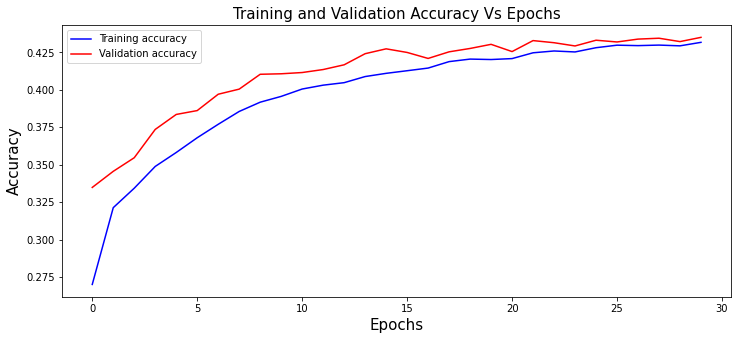

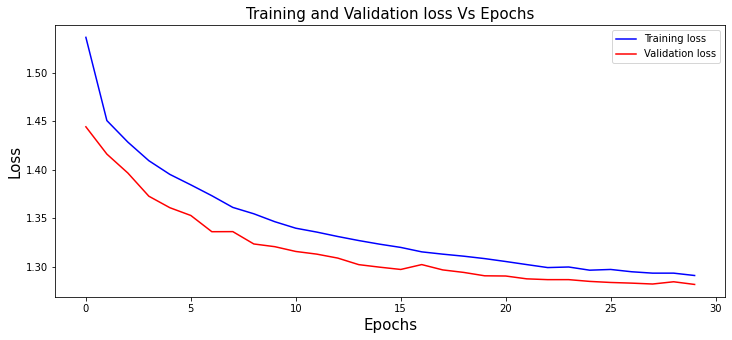

In [0]:
accuracy = xception_train.history['acc']
val_accuracy = xception_train.history['val_acc']

loss = xception_train.history['loss']
val_loss = xception_train.history['val_loss']

epochs = range(len(accuracy))

plt.figure(figsize=(12, 5))


plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy Vs Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend()

plt.figure(figsize=(12, 5))

plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation loss Vs Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()
plt.show()

# **VGG16**

## Preprocess input

In [0]:
from tensorflow.keras.applications.vgg16 import preprocess_input

tr_x_train = preprocess_input(tr_x_train)
tr_x_val = preprocess_input(tr_x_val)
tr_df_test2 = preprocess_input(df_test2)

## Load pretrained model

In [0]:
vgg = VGG16(include_top= False, weights= 'imagenet', input_shape= (48, 48, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

## Extract Features

In [0]:
# Extracting features
train_features = vgg.predict(np.array(tr_x_train), batch_size=16, verbose=1)
test_features = vgg.predict(np.array(test_feat), batch_size=16, verbose=1)
val_features = vgg.predict(np.array(tr_x_val), batch_size=16, verbose=1)

# Current shape of features
print(train_features.shape)
print(test_features.shape)
print(val_features.shape)

12000/12000 [==============================] - 5s 393us/step
(48000, 1, 1, 512)
(10000, 1, 1, 512)
(12000, 1, 1, 512)


## Flatten

In [0]:
# Flatten extracted features
train_flatten = np.reshape(train_features, (48000, 1*1*512))
test_flatten = np.reshape(test_features, (10000, 1*1*512))
val_flatten = np.reshape(val_features, (12000, 1*1*512))

# New shape of features
print(train_flatten.shape)
print(test_flatten.shape)
print(val_flatten.shape)

(48000, 512)
(10000, 512)
(12000, 512)


## Add dense layers

In [0]:
# Add dense layers to the model

n_train = train_flatten.shape[0]
n_val = val_flatten.shape[0]
epoch = 100

vgg = models.Sequential()

vgg.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
vgg.add(layers.Dropout(0.5))

vgg.add(layers.Dense(64, activation='relu'))
vgg.add(layers.Dropout(0.5))


vgg.add(layers.LeakyReLU(alpha=0.1))

vgg.add(layers.Dense(5, activation= 'softmax'))



## Compile the model

In [0]:
# Compile the model.
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

vgg.compile(loss='categorical_crossentropy',optimizer= opt, metrics=['acc'])

## Train the model

In [0]:
rop = ReduceLROnPlateau(monitor='val_loss',
                        factor=0.2,
                        patience=2,
                        verbose=1,
                        mode='auto',
                        min_detla=0.0001,
                        cooldown=2,
                        min_lr=0)

es = callbacks.EarlyStopping(monitor='val_loss',
                                        min_delta=0,
                                        patience=7,
                                        verbose=1,
                                        mode='auto')

lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

# callback = [rop, es]

# Train the the model
vgg_train = vgg.fit(train_flatten, tr_y_train, epochs=100, validation_data=(val_flatten, tr_y_val),
                    callbacks= [lr])

Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 1.4572 - acc: 0.4223 - val_loss: 0.9188 - val_acc: 0.6013 - lr: 0.0010
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0219 - acc: 0.5446 - val_loss: 0.7938 - val_acc: 0.6739 - lr: 9.0000e-04
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.9233 - acc: 0.5933 - val_loss: 0.7390 - val_acc: 0.6904 - lr: 8.1000e-04
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8471 - acc: 0.6291 - val_loss: 0.7075 - val_acc: 0.7005 - lr: 7.2900e-04
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7960 - acc: 0.6531 - val_loss: 0.6698 - val_acc: 0.7209 - lr: 6.5610e-04
Epoch 6/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7517 - acc: 0.6751 - val_loss: 0.6555 - val_acc: 0.7320 - lr: 5.9049e-04
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7201 - acc: 0

## Plots

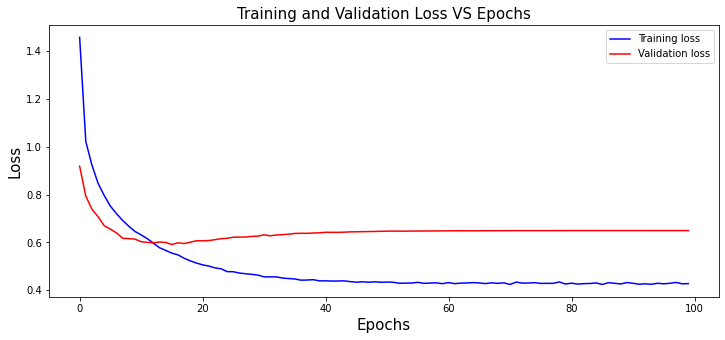

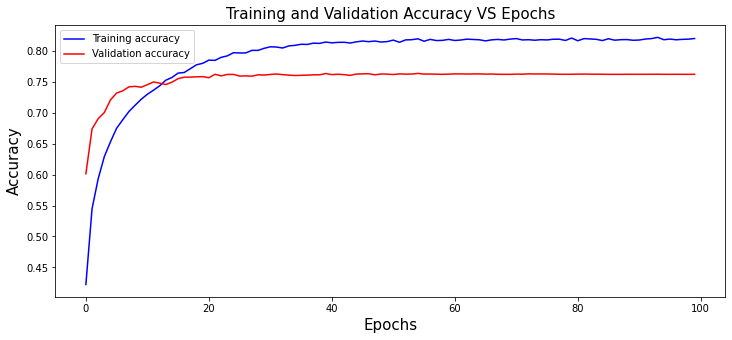

In [0]:
accuracy = vgg_train.history['acc']
val_accuracy = vgg_train.history['val_acc']

loss = vgg_train.history['loss']
val_loss = vgg_train.history['val_loss']

epochs = range(len(accuracy))

#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()


#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend()

